## Analysing an image classifier using a generative model

This script takes as input a classifier and a generative model, and produces *num_samples* samples. 
The results are displayed in a figure displaying four images with predictions 100%, >99%, >97%, and >90%. It then computes the percentage of images in each of the four cases.

In [6]:
import sys
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import bisect
%matplotlib inline

digit = 8
number_samples = 10000

classifier = tf.keras.models.load_model('/Models/classifier_capacity1_simple.model')
gan = tf.keras.models.load_model('/Models/gan_digit8_rich.h5')

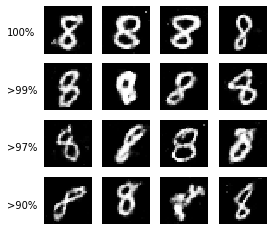

In [11]:
fig = plt.figure(figsize=(4, 4))

plt.axis("off")

data = []
    
for i in range(number_samples):
    noise = np.random.normal(0,1,size=[1,10])
    generated_image = gan.predict(noise)
    generated_image = generated_image.reshape(1,28,28,1)
    score = classifier.predict(generated_image)[0][digit]*100
    data.append((score, generated_image))

data.sort(key = lambda x : x[0])
list_scores = [x[0] for x in data]

fig.text(0,0.78,"100%")
fig.text(0,0.58,">99%")
fig.text(0,0.38,">97%")
fig.text(0,0.18,">90%")

b3 = bisect.bisect(list_scores,90)
for i in range(4):
    fig.add_subplot(4,4,i+13)
    plt.imshow(data[b3 + i][1][0].reshape(28,28),cmap='gray')
    plt.axis("off")

b2 = bisect.bisect(list_scores,97)
for i in range(4):
    fig.add_subplot(4,4,i+9)
    plt.imshow(data[b2 + i][1][0].reshape(28,28),cmap='gray')
    plt.axis("off")

b1 = bisect.bisect(list_scores,99)
for i in range(4):
    fig.add_subplot(4,4,i+5)
    plt.imshow(data[b1 + i][1][0].reshape(28,28),cmap='gray')
    plt.axis("off")

for i in range(4):
    fig.add_subplot(4,4,i+1)
    plt.imshow(data[number_samples - 1 - i][1][0].reshape(28,28),cmap='gray')
    plt.axis("off")
    
plt.savefig('analysis.png')
plt.show()

We then plot prediction accuracy (of the image classifier) across the generated images.

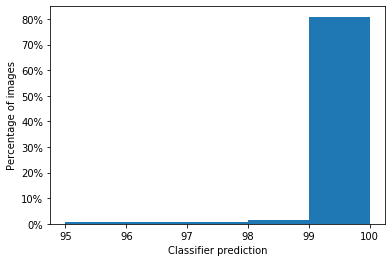

Percentage of images with > 90% prediction: 85.85 %

Percentage of images with > 97% prediction: 83.07 %

Percentage of images with > 99% prediction: 80.88 %



In [13]:
fig, ax = plt.subplots()
plt.hist(list_scores, [95,96,97,98,99,100], weights = np.ones(number_samples) / number_samples)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.xlabel('Classifier prediction')
plt.ylabel('Percentage of images')
plt.show()
fig.savefig('score.png', dpi=200)

print("Percentage of images with > 90%% prediction: %.2f %%\n" % (100.0 * ((number_samples - b3) / number_samples)))
print("Percentage of images with > 97%% prediction: %.2f %%\n" % (100.0 * ((number_samples - b2) / number_samples)))
print("Percentage of images with > 99%% prediction: %.2f %%\n" % (100.0 * ((number_samples - b1) / number_samples)))